/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in power


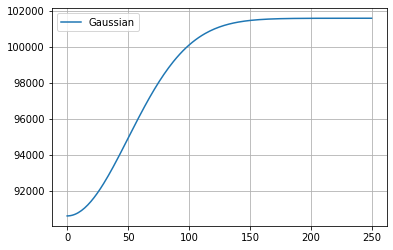

In [ ]:
# import wrftools as wrf
from matplotlib import pyplot as plt
import numpy as np
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

def getHalfLife(y,t,ax,tmin=0,tmax=12,C=0,rmax=0,pdef0=pdef0):
  
  y=y[tmin:tmax+1]
  t=t[tmin:tmax+1]
  def fit_exp_linear(t, y, C=0):
    y = y - C
    y = np.log(y)
    K, A_log = np.polyfit(t, y, 1)
    A = np.exp(A_log)
    return A, K
  def model_func(t, A, K, C):
    return A * np.exp(K * t) + C

  A, K = fit_exp_linear(t, y, C=C)
  fit_y = model_func(t, A, K, C)

  r2=np.power(np.corrcoef(y,fit_y)[0,1],2)

  ax.plot(t,y/100)
  ax.plot(t,fit_y/100)
  ax.grid(True)

  thalf=-np.log(2)/K
  ax.text(0.6,0.64,'r$_{max}$=' + str(round(rmax/1000,2)), transform=ax.transAxes)
  ax.text(0.6,0.8,'t$_{1/2}$=' + str(round(thalf,2)), transform=ax.transAxes)
  ax.text(0.6,0.73,'r$^2$=' + str(round(r2,4)), transform=ax.transAxes)
  ax.set_xlabel('Time (h)')
  ax.set_ylabel('P (hPa)')
  # ax.legend(('sim','exp fit'))
  return(thalf)

run='run_land_t06'
vrmax=-0.05
rmax=50000

# flist=wrf.getflist(run)
# r=wrf.getRcoord(wrf.wopath(run,flist[0]))*1000
r=np.arange(0,250000,1300)
dr=(r[1]-r[0])
rkm=r/1000

# Pwrf0=wrf.getWRF(run, flist[0], 'P',type='az',z=0)*100
Penv=101600
Pdef0=11000
Pexp0=Penv-Pdef0*np.exp(-(0.5*(r/rmax)**2))
# dPdr=np.gradient(Pexp0)/dr

c=-0.5
Ppow0=Penv-Pdef0*(r/rmax)**c

plt.plot(rkm,Pexp0)
# plt.plot(rkm,Pwrf0)
# plt.plot(rkm,Ppow0)
plt.legend(['Gaussian'])
plt.grid(True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


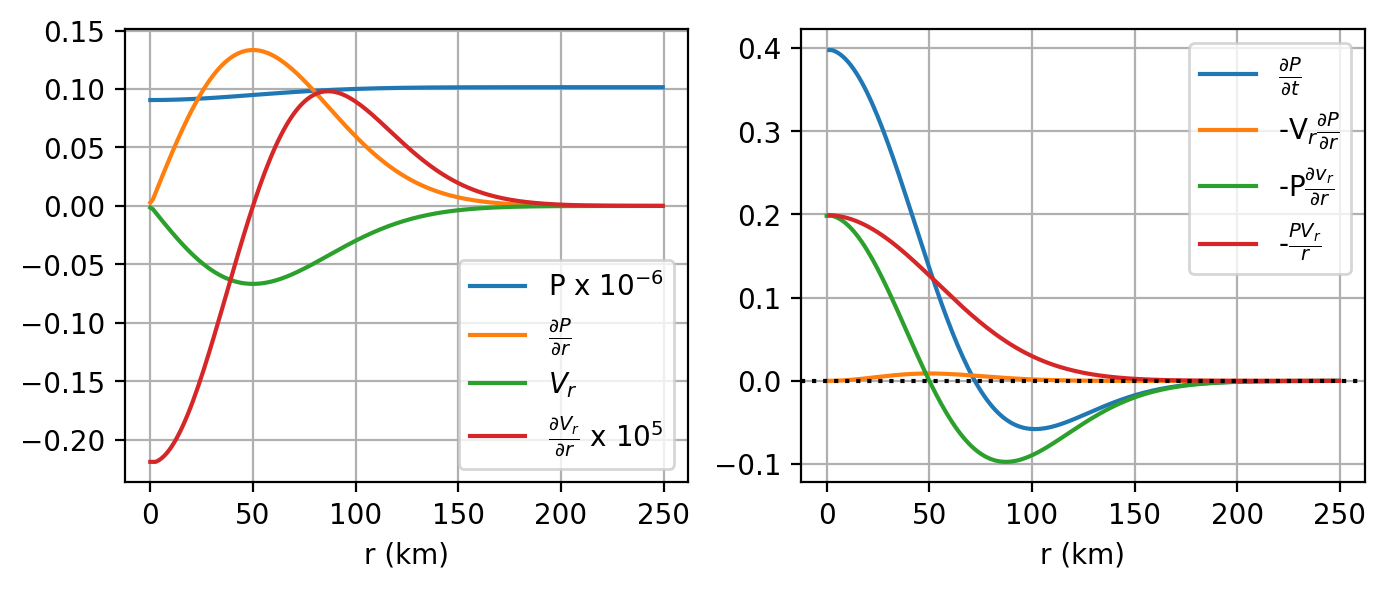

In [ ]:
def dPdr2vr(dPdr,r):
#     # ramp up/down
#     rmaxx=np.argmax(dPdr)
#     rampup=np.linspace(0,vrmax,num=rmaxx)
#     rampdown=np.linspace(vrmax,0,num=len(r)-rmaxx+1)
#     v=np.concatenate((rampup,rampdown[1:]))
    v=dPdr*-.5
    return(v)

p=Pexp0
dpdr=np.gradient(p)/dr

v=dPdr2vr(dpdr,r)
dvdr=np.gradient(v)/dr
dvdr[1]=dvdr[2]
dvdr[0]=dvdr[1]

adv=-v*dpdr
div=-p*dvdr
geo=-p*v/r
dpdt=adv+div+geo

fig,axs=plt.subplots(1,2,dpi=200,figsize=(8,3))
ax=axs[0]

ax.plot(rkm,p/1000000)
ax.plot(rkm,dpdr)
ax.plot(rkm,v)
ax.plot(rkm,dvdr*100000)
ax.legend(('P x 10$^{-6}$',r'$\frac{\partial P}{\partial r}$','$V_r$',r'$\frac{\partial V_r}{\partial r}$ x 10$^5$'))
ax.set_xlabel('r (km)')
ax.grid(True)

ax=axs[1]
ax.plot(rkm,dpdt)
ax.plot(rkm,adv)
ax.plot(rkm,div)
ax.plot(rkm,geo)
ax.legend((r'$\frac{\partial P}{\partial t}$',r'-V$_r\frac{\partial P}{\partial r}$',r'-P$\frac{\partial v_r}{\partial r}$',r'-$\frac{PV_r}{r}$'))
ax.set_xlabel('r (km)');
ax.axhline(color='k',linestyle=':')
ax.grid(True);

In [ ]:
def evolveP(P,r,dt):
    dr=(r[1]-r[0])
    dPdr=np.gradient(P)/dr
    v=dPdr2vr(dPdr,r)
    dvdr=np.gradient(v)/dr
    adv=-v*dPdr
    div=-P*dvdr
    geo=-v*P/r
    geo[0]=geo[1]
    div[0]=div[1]
    dP=dt*(adv+div+geo)
    # print(geo)
    return(P+dP)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


Text(0, 0.5, 'P (hPa)')

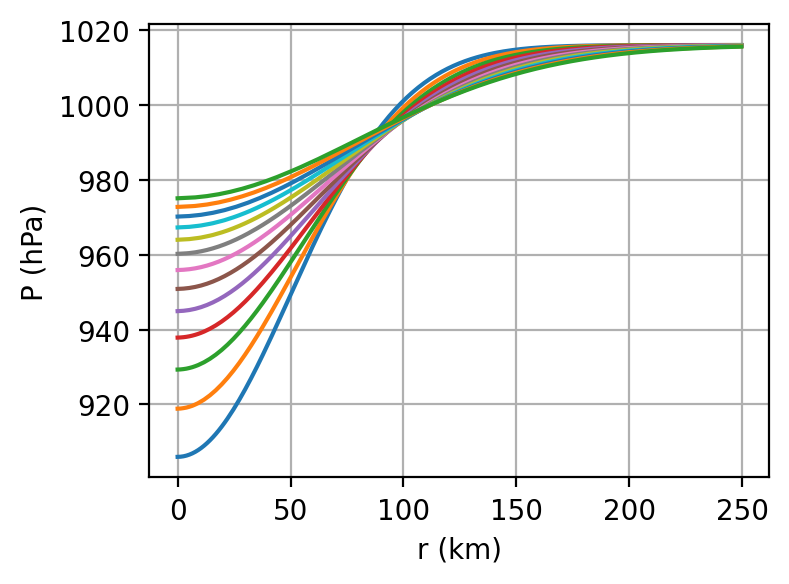

In [ ]:
dt=60
P0=Pexp0
Pl=[P0]

for n in range(0,(60*12)):
    Pl.append(evolveP(Pl[-1],r,dt))

fig,axs=plt.subplots(1,1,dpi=200,figsize=(4,3))
ax=axs
for P in Pl[::60]:
    ax.plot(rkm,P/100)
ax.grid(True)
ax.set_xlabel('r (km)')
ax.set_ylabel('P (hPa)')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


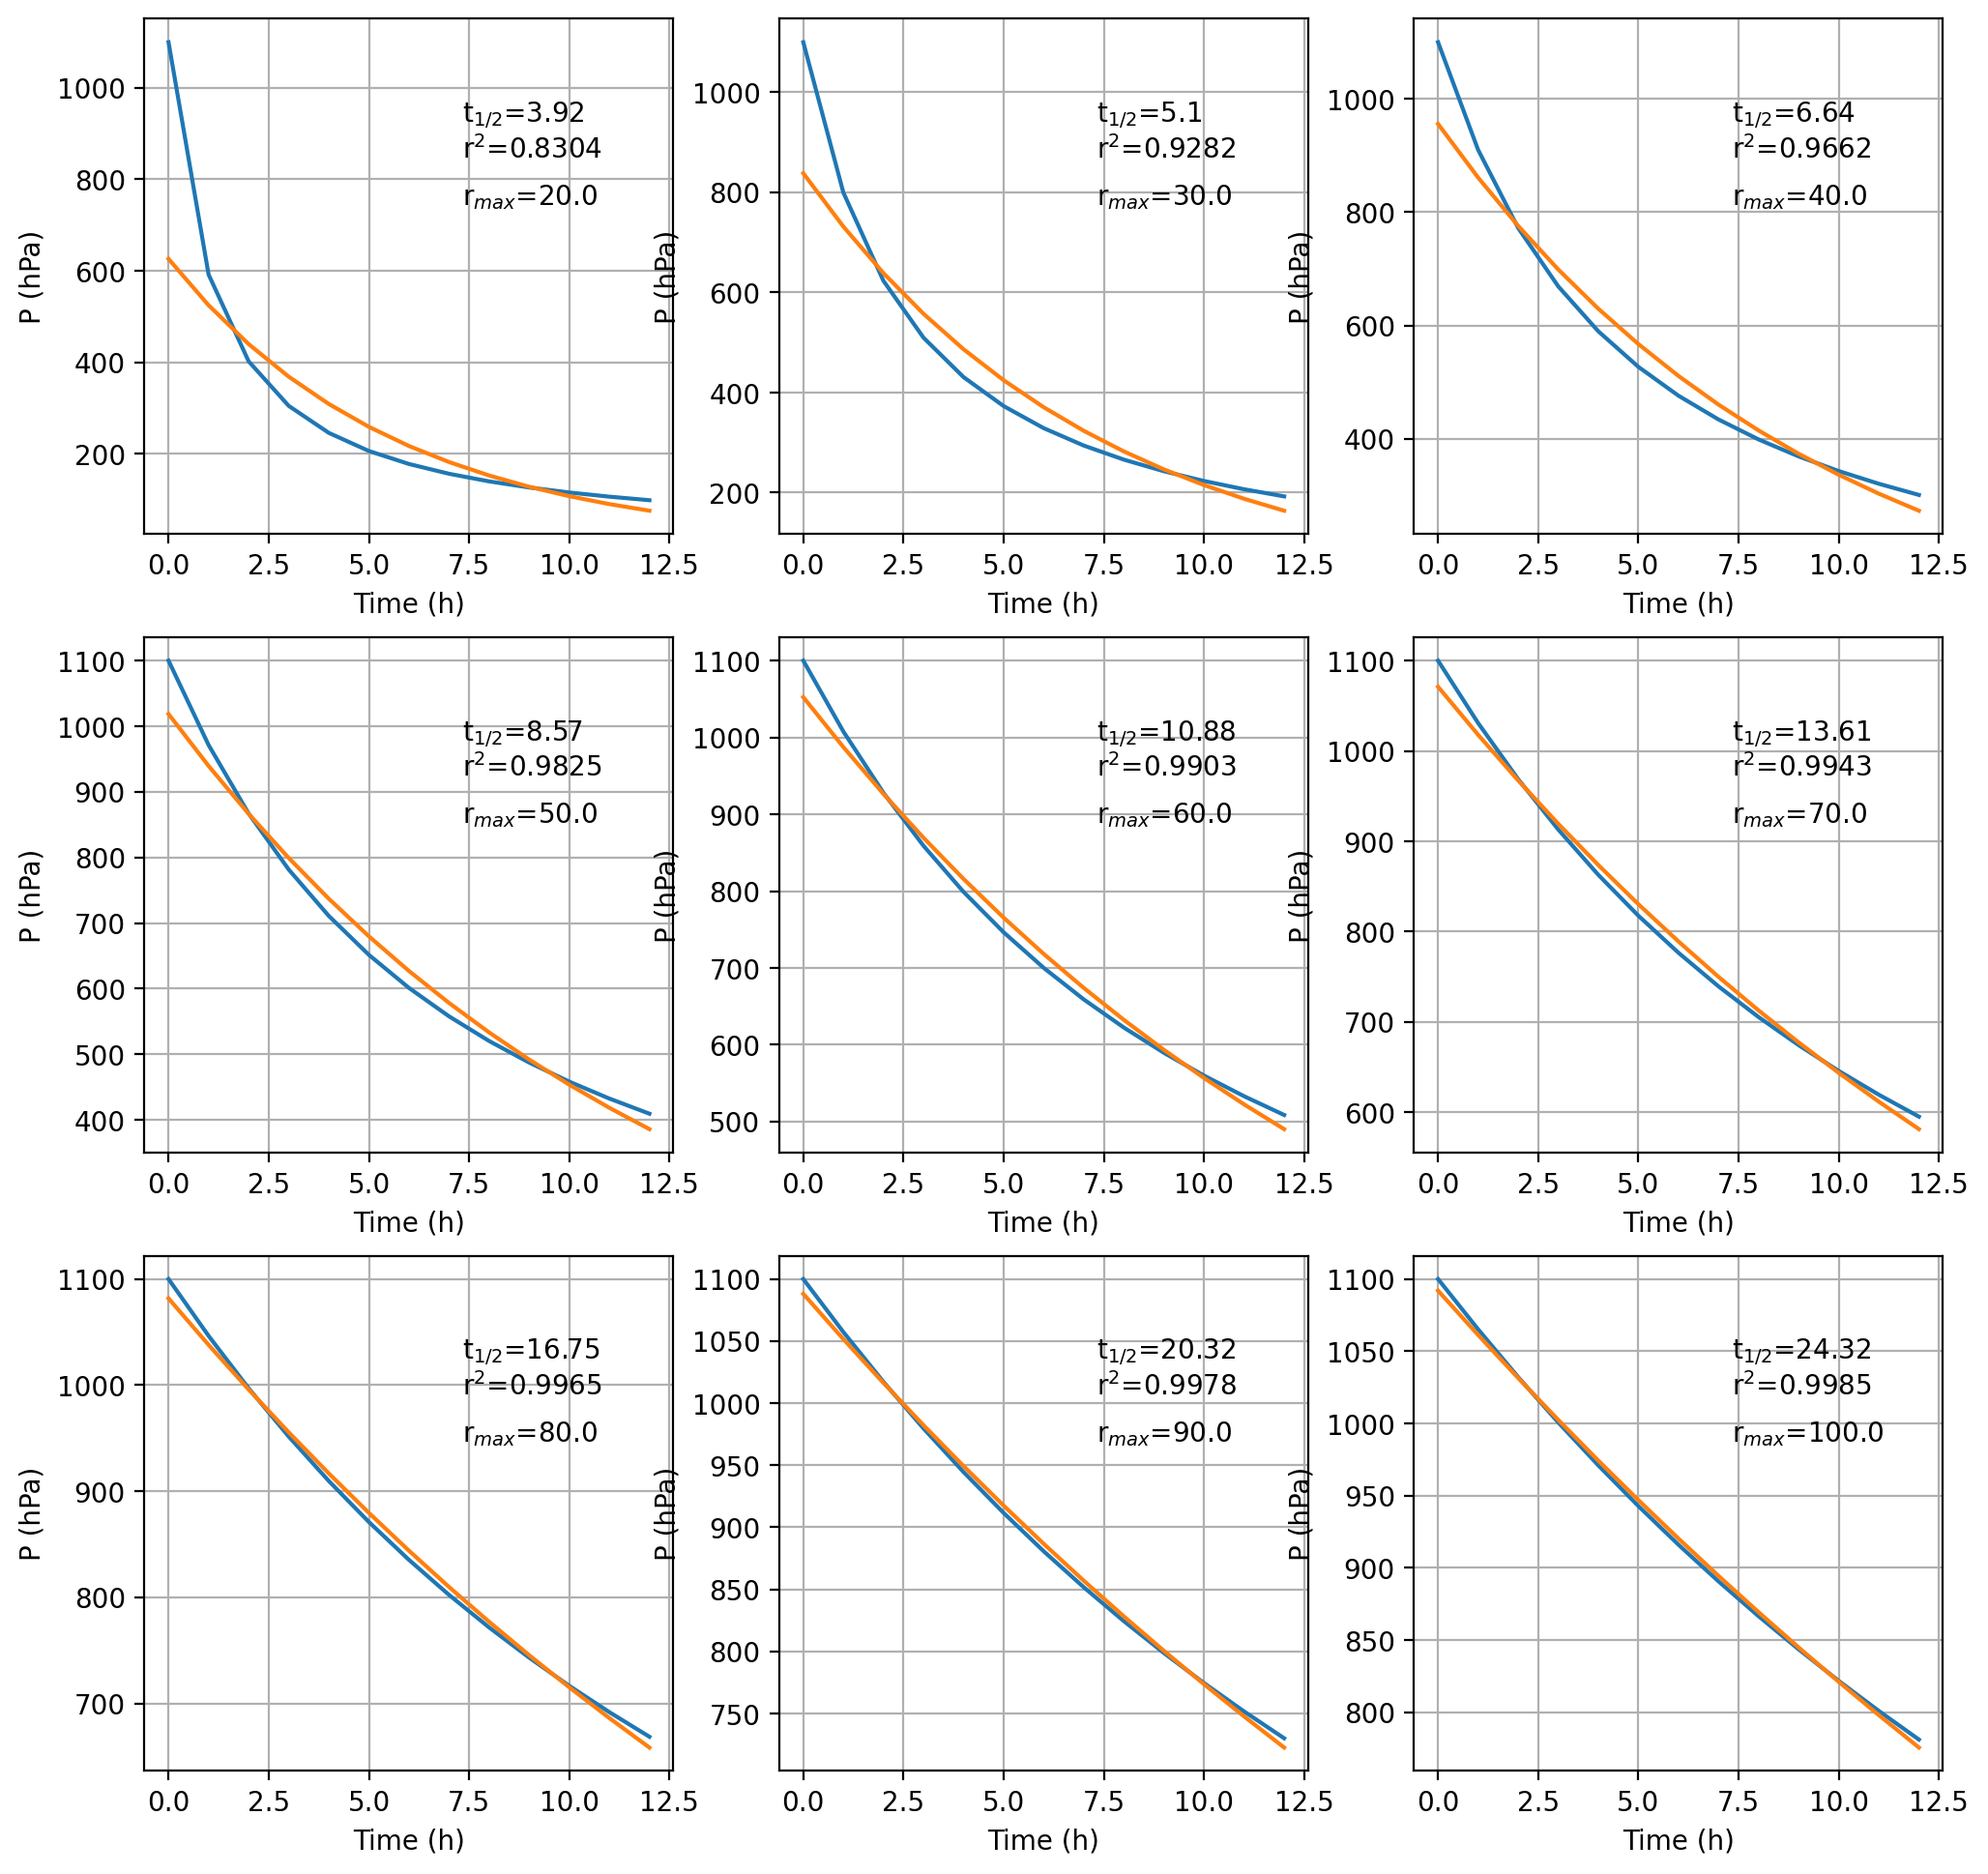

In [ ]:
rmaxs=np.arange(20,110,10)*1000
fig,axs=plt.subplots(3,3,dpi=200,figsize=(12,12))
hl=[]
for rn,rmax in enumerate(rmaxs):
  Penv=101600
  Pdef0=11000
  P0=Penv-Pdef0*np.exp(-(0.5*(r/rmax)**2))

  Pl=[P0]
  for n in range(0,(60*12)):
    Pl.append(evolveP(Pl[-1],r,dt))

  pmin=[x[0] for x in Pl]
  pminfit=101600-np.array(pmin[0:13*60:60])
  t=np.arange(0,13)
  th=getHalfLife(pminfit*10,t,axs.flat[rn],rmax=rmax)
  hl.append(th)


Text(0.5, 0, 'Rmax (km)')

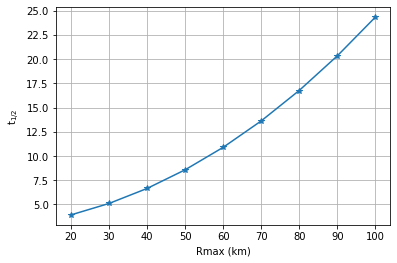

In [ ]:
fig,ax=plt.subplots(1,1)
ax.plot(rmaxs/1000,hl,marker='*')
ax.grid(True)
ax.set_ylabel('t$_{1/2}$')
ax.set_xlabel('Rmax (km)')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


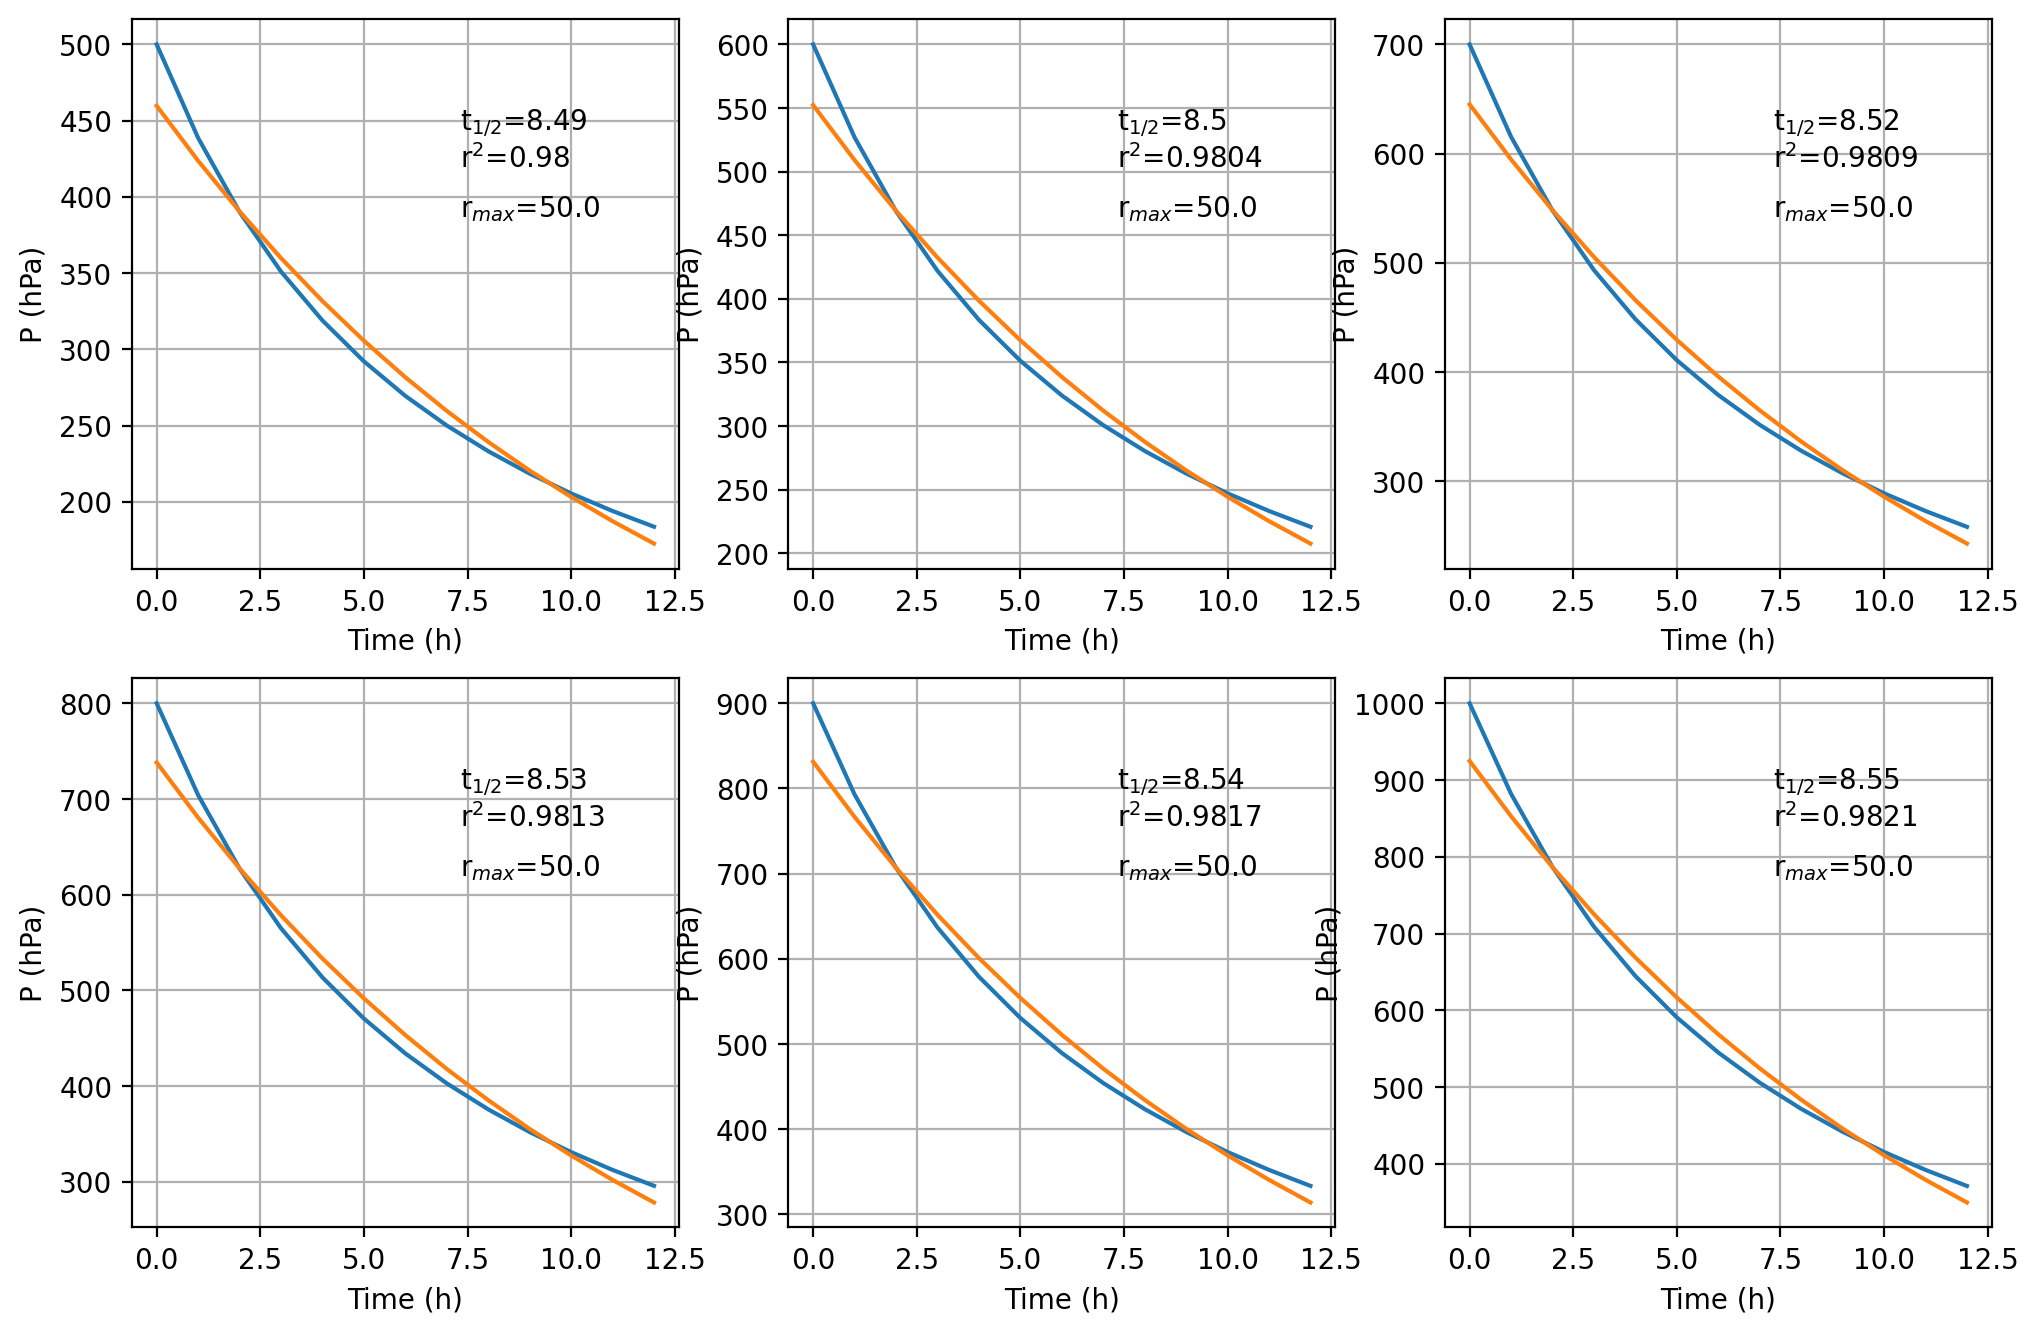

In [ ]:
Pdef0s=np.arange(5000,11000,1000)
fig,axs=plt.subplots(2,3,dpi=200,figsize=(12,8))
hl=[]
for rn,Pdef0 in enumerate(Pdef0s):
  rmax=50000
  Penv=101600
  P0=Penv-Pdef0*np.exp(-(0.5*(r/rmax)**2))

  Pl=[P0]
  for n in range(0,(60*12)):
    Pl.append(evolveP(Pl[-1],r,dt))

  pmin=[x[0] for x in Pl]
  pminfit=101600-np.array(pmin[0:13*60:60])
  t=np.arange(0,13)
  th=getHalfLife(pminfit*10,t,axs.flat[rn],rmax=rmax)
  hl.append(th)

Text(0.5, 0, 'Pdef (hPa)')

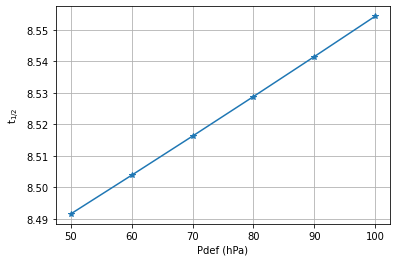

In [ ]:
fig,ax=plt.subplots(1,1)
ax.plot(Pdef0s/100,hl,marker='*')
ax.grid(True)
ax.set_ylabel('t$_{1/2}$')
ax.set_xlabel('Pdef (hPa)')